In [10]:
from monai.data import PersistentDataset, DataLoader
import pandas as pd
import numpy as np
from pathlib import Path
import monai.transforms as T
import torch
import warnings
warnings.filterwarnings("ignore", "You are using `torch.load` with `weights_only=False`*.")
# Using MONAI for medical imaging tasks
# ---- Config ----
csv_path = Path("/home/tibia/Projet_Hemorragie/MBH_label_case/splits/train_split.csv")
nii_dir = Path("/home/tibia/Projet_Hemorragie/MBH_label_case")
cache_dir = Path("./persistent_cache/3D_train_cache")  
# Ensure cache directory exists
cache_dir.mkdir(parents=True, exist_ok=True)

label_cols = ['any', 'epidural', 'intraparenchymal', 'intraventricular', 'subarachnoid', 'subdural']
df = pd.read_csv(csv_path)

# ---- Build MONAI-style data list ----
data_list = [
    {
        "image": str(nii_dir / f"{row['patientID_studyID']}.nii.gz"),
        "label": np.array([row[col] for col in label_cols], dtype=np.float32)
    }
    for _, row in df.iterrows()
]




#print (data_list[:5] ) # Print first 5 entries for debugging
# ---- Transforms ----
window_preset = {"window_center": 40, "window_width": 80}




train_transforms = T.Compose([
    # Load image only
    T.LoadImaged(keys=["image"], image_only=True),  
    T.EnsureChannelFirstd(keys=["image"]),
    
    # Harmonisation spatiale
    T.Orientationd(keys=["image"], axcodes='RAS'),
    T.Spacingd(keys=["image"], pixdim=(1.0, 1.0, 1.0), mode="bilinear"),
    
   
    T.ResizeWithPadOrCropd(
        keys=["image"], 
        spatial_size=(224, 224, 144),
        mode="constant",  # Padding avec des zéros
        constant_values=0
    ),
    
    # Intensity normalization
    T.ScaleIntensityRanged(
        keys=["image"],
        a_min=window_preset["window_center"] - window_preset["window_width"] // 2,
        a_max=window_preset["window_center"] + window_preset["window_width"] // 2,
        b_min=0.0,
        b_max=1.0,
        clip=True
    ),

    # Augmentations
    T.RandFlipd(keys=["image"], spatial_axis=[0, 1, 2], prob=0.5),
    T.RandRotate90d(keys=["image"], spatial_axes=(0, 1), prob=0.5),
    T.RandScaleIntensityd(keys=["image"], factors=0.1, prob=0.5),
    T.RandShiftIntensityd(keys=["image"], offsets=0.1, prob=0.5),

    # Final tensor
    T.ToTensord(keys=["image", "label"])
])


# ---- PersistentDataset ----
train_dataset = PersistentDataset(
    data=data_list,
    transform=train_transforms,
    cache_dir=str(cache_dir),
)



print(f" Dataset ready with {len(train_dataset)} samples and cached transforms at {cache_dir}")
print("Vérification des tailles des premières images:")
for i in range(min(20, len(train_dataset))):
    sample = train_dataset[i]
    print(f"Image {i}: {sample['image'].shape}, Label: {sample['label'].shape}")


 Dataset ready with 1274 samples and cached transforms at persistent_cache/3D_train_cache
Vérification des tailles des premières images:
Image 0: torch.Size([1, 224, 224, 144]), Label: torch.Size([6])
Image 1: torch.Size([1, 224, 224, 144]), Label: torch.Size([6])
Image 2: torch.Size([1, 224, 224, 144]), Label: torch.Size([6])
Image 3: torch.Size([1, 224, 224, 144]), Label: torch.Size([6])
Image 4: torch.Size([1, 224, 224, 144]), Label: torch.Size([6])
Image 5: torch.Size([1, 224, 224, 144]), Label: torch.Size([6])
Image 6: torch.Size([1, 224, 224, 144]), Label: torch.Size([6])
Image 7: torch.Size([1, 224, 224, 144]), Label: torch.Size([6])
Image 8: torch.Size([1, 224, 224, 144]), Label: torch.Size([6])
Image 9: torch.Size([1, 224, 224, 144]), Label: torch.Size([6])
Image 10: torch.Size([1, 224, 224, 144]), Label: torch.Size([6])
Image 11: torch.Size([1, 224, 224, 144]), Label: torch.Size([6])
Image 12: torch.Size([1, 224, 224, 144]), Label: torch.Size([6])
Image 13: torch.Size([1, 224

In [4]:
from monai.data import PersistentDataset, DataLoader
import pandas as pd
import numpy as np
from pathlib import Path
import monai.transforms as T
import torch
import warnings
warnings.filterwarnings("ignore", "You are using `torch.load` with `weights_only=False`*.")

# ---- Config ----
csv_path = Path("/home/tibia/Projet_Hemorragie/MBH_label_case/splits/train_split.csv")
nii_dir = Path("/home/tibia/Projet_Hemorragie/MBH_label_case")
cache_dir = Path("./persistent_cache/3D_train_cache")  
cache_dir.mkdir(parents=True, exist_ok=True)

label_cols = ['any', 'epidural', 'intraparenchymal', 'intraventricular', 'subarachnoid', 'subdural']
df = pd.read_csv(csv_path)

# ---- Build MONAI-style data list ----
data_list = [
    {
        "image": str(nii_dir / f"{row['patientID_studyID']}.nii.gz"),
        "label": np.array([row[col] for col in label_cols], dtype=np.float32)
    }
    for _, row in df.iterrows()
]

# ---- Transforms CORRIGÉES ----
window_preset = {"window_center": 40, "window_width": 80}

train_transforms = T.Compose([
    # Load image only
    T.LoadImaged(keys=["image"], image_only=True),  
    T.EnsureChannelFirstd(keys=["image"]),
    
    # Harmonisation spatiale
    T.Orientationd(keys=["image"], axcodes='RAS'),
    T.Spacingd(keys=["image"], pixdim=(1.0, 1.0, 1.0), mode="bilinear"),
    
   
    T.ResizeWithPadOrCropd(
        keys=["image"], 
        spatial_size=(224, 224, 144),
        mode="constant",  # Padding avec des zéros
        constant_values=0
    ),
    
    # Intensity normalization
    T.ScaleIntensityRanged(
        keys=["image"],
        a_min=window_preset["window_center"] - window_preset["window_width"] // 2,
        a_max=window_preset["window_center"] + window_preset["window_width"] // 2,
        b_min=0.0,
        b_max=1.0,
        clip=True
    ),

    # Augmentations
    T.RandFlipd(keys=["image"], spatial_axis=[0, 1, 2], prob=0.5),
    T.RandRotate90d(keys=["image"], spatial_axes=(0, 1), prob=0.5),
    T.RandScaleIntensityd(keys=["image"], factors=0.1, prob=0.5),
    T.RandShiftIntensityd(keys=["image"], offsets=0.1, prob=0.5),

    # Final tensor
    T.ToTensord(keys=["image", "label"])
])

# ---- PersistentDataset ----
train_dataset = PersistentDataset(
    data=data_list,
    transform=train_transforms,
    cache_dir=str(cache_dir),
)

print(f"Dataset ready with {len(train_dataset)} samples and cached transforms at {cache_dir}")

# Test pour vérifier les tailles
print("Vérification des tailles des premières images:")
for i in range(min(20, len(train_dataset))):
    sample = train_dataset[i]
    print(f"Image {i}: {sample['image'].shape}, Label: {sample['label'].shape}")

Dataset ready with 1274 samples and cached transforms at persistent_cache/3D_train_cache
Vérification des tailles des premières images:
Image 0: torch.Size([1, 224, 224, 144]), Label: torch.Size([6])
Image 1: torch.Size([1, 224, 224, 144]), Label: torch.Size([6])
Image 2: torch.Size([1, 224, 224, 144]), Label: torch.Size([6])
Image 3: torch.Size([1, 224, 224, 144]), Label: torch.Size([6])
Image 4: torch.Size([1, 224, 224, 144]), Label: torch.Size([6])
Image 5: torch.Size([1, 224, 224, 144]), Label: torch.Size([6])
Image 6: torch.Size([1, 224, 224, 144]), Label: torch.Size([6])
Image 7: torch.Size([1, 224, 224, 144]), Label: torch.Size([6])
Image 8: torch.Size([1, 224, 224, 144]), Label: torch.Size([6])
Image 9: torch.Size([1, 224, 224, 144]), Label: torch.Size([6])
Image 10: torch.Size([1, 224, 224, 144]), Label: torch.Size([6])
Image 11: torch.Size([1, 224, 224, 144]), Label: torch.Size([6])
Image 12: torch.Size([1, 224, 224, 144]), Label: torch.Size([6])
Image 13: torch.Size([1, 224,

In [5]:
DEVICE = torch.device("cuda:1" if torch.cuda.is_available() else "cpu")
DEVICE


device(type='cuda', index=1)

In [6]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision.models import resnet18
from monai.networks.nets import densenet121,SEResNet50,ResNet
from monai.transforms import Compose, Resize, ToTensor
from monai.data import DataLoader, PersistentDataset, Dataset
from tqdm import tqdm
import os
# === Hyperparams ===

NUM_CLASSES = 6
BATCH_SIZE = 32
EPOCHS = 3
LR = 1e-3

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=8,persistent_workers= True,pin_memory=True)
print(f"Using device: {DEVICE}")
print(f"Number of Batches in the dataset: {len(train_loader)}")

# === Model ===
model = ResNet(
        block='basic',
        layers=[1, 1, 1, 1],        # Beaucoup moins de couches (vs [2,2,2,2])
        block_inplanes=[32, 64, 128, 256],  # Moins de channels (vs [64,128,256,512])
        spatial_dims=3,
        n_input_channels=1,
        num_classes=NUM_CLASSES,
        conv1_t_size=7,
        conv1_t_stride=(2, 2, 2)    # Stride dans les 3 dimensions
    )
# model = SEResNet50(
#     spatial_dims=2,         # Because you work with 2D CT slices
#     in_channels=1,          # 1 channel for grayscale CT (unless you use 3-slice input, see tip below)
#     num_classes= NUM_CLASSES,          # Set this to number of hemorrhage types you want to classify
#     pretrained=False,       # Can be True if input has 3 channels and you're okay fine-tuning from ImageNet
#     dropout_prob=0.2,       # Helps regularize on smaller datasets
#     reduction=16,           # Default for Squeeze-and-Excitation; works well
#     input_3x3=True,         # Enables better local feature extraction at first layer
#     downsample_kernel_size=3  # Slightly better spatial feature preservation
#)
#model = densenet121(spatial_dims=2, in_channels=1, out_channels=NUM_CLASSES)
model.to(DEVICE)
#print (model)
# === Loss (Inspiré Al )

pos_weights = torch.tensor([1.0] * NUM_CLASSES, dtype=torch.float).to(DEVICE)
print(f"répartition des poids : {pos_weights}")
loss_fn= nn.BCEWithLogitsLoss(pos_weight=pos_weights)

# === Optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=LR)
print("Test du DataLoader:")
try:
    batch = next(iter(train_loader))
    print(f"Batch image shape: {batch['image'].shape}")
    print(f"Batch label shape: {batch['label'].shape}")
    print("✅ DataLoader fonctionne correctement!")
except Exception as e:
    print(f"❌ Erreur dans le DataLoader: {e}")


Using device: cuda:1
Number of Batches in the dataset: 40
répartition des poids : tensor([1., 1., 1., 1., 1., 1.], device='cuda:1')
Test du DataLoader:
Batch image shape: torch.Size([32, 1, 224, 224, 144])
Batch label shape: torch.Size([32, 6])
✅ DataLoader fonctionne correctement!


In [ ]:
try : 
    ! pip install torchinfo

except:
    print("torchinfo is already installed or installation failed.")
    
import torchinfo
from torchinfo import summary
# Display model summary
model = model.to(DEVICE)
summary(model, input_size=(BATCH_SIZE, 1, 224, 224,144))


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


Layer (type:depth-idx)                   Output Shape              Param #
ResNet                                   [32, 6]                   --
├─Conv3d: 1-1                            [32, 32, 112, 112, 72]    10,976
├─BatchNorm3d: 1-2                       [32, 32, 112, 112, 72]    64
├─ReLU: 1-3                              [32, 32, 112, 112, 72]    --
├─MaxPool3d: 1-4                         [32, 32, 56, 56, 36]      --
├─Sequential: 1-5                        [32, 32, 56, 56, 36]      --
│    └─ResNetBlock: 2-1                  [32, 32, 56, 56, 36]      --
│    │    └─Conv3d: 3-1                  [32, 32, 56, 56, 36]      27,648
│    │    └─BatchNorm3d: 3-2             [32, 32, 56, 56, 36]      64
│    │    └─ReLU: 3-3                    [32, 32, 56, 56, 36]      --
│    │    └─Conv3d: 3-4                  [32, 32, 56, 56, 36]      27,648
│    │    └─BatchNorm3d: 3-5             [32, 32, 56, 56, 36]      64
│    │    └─ReLU: 3-6                    [32, 32, 56, 56, 36]      --
├─S

: 

In [13]:
from timeit import default_timer as timer
def print_train_time(start:float,end:float,device:torch.device=None):
    total_time=end-start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

def compute_accuracy(y_pred, y_true, threshold=0.5):
    """
    Renvoie l'accuracy multilabel (exact match pour chaque label indépendamment).
    """
    preds = torch.sigmoid(y_pred) > threshold
    #print(f"preds: {preds}")
    correct = (preds == y_true.bool()).float()
    #print(f"correct: {correct}")
    return correct.mean().item()



In [14]:
def train_step(model:torch.nn.Module,
                dataloader:torch.utils.data.DataLoader,
                loss_fn:torch.nn.Module,
                optimizer:torch.optim,
                device:torch.device=DEVICE):
   
    train_loss=0


    model.train()

    for i, batch in enumerate(dataloader):
      X = batch["image"].to(device)
      y = batch["label"].to(device)
    
      #1. forward pass (output the raw logits from the model )
      y_pred=model(X)

      #2. Calculate loss and accuracy (per batch)
      loss=loss_fn(y_pred,y)
      train_loss += loss


      #3. Optimizer zero grad 
      optimizer.zero_grad()

      #4. Loss backward
      loss.backward()

      #5. Optimizer step
      
      optimizer.step()
      #Divide total train loss and acc by lenght of train dataloader
    
      if (i% 400 == 0):
        print(f"Looked at {i * len(X)}/{len(dataloader.dataset)} samples")
      
    train_loss /= len(dataloader)
   

    print(f"Train loss: {train_loss:.5f} ")


def val_step(model:torch.nn.Module,
                dataloader:torch.utils.data.DataLoader,
                loss_fn:torch.nn.Module,
                device:torch.device=DEVICE):
    """Performs a testing loop step on model going over data_loader"""
   
    test_loss=0


    model.eval()

    with torch.inference_mode():
      for batch,(X_test,y_test) in enumerate(dataloader):
     
        X_test,y_test=X_test.to(device),y_test.to(device)

      #1. forward pass (output the raw logits from the model )
        test_pred=model(X_test)

      #2. Calculate loss and accuracy (per batch)
        loss=loss_fn(test_pred,y_test)
        test_loss += loss
        test_acc += compute_accuracy(y_true=y_test,y_pred=test_pred) # go from logits -> prediction labels
     
        if (batch % 400 == 0):
          print(f"Looked at {batch * len(X_test)}/{len(dataloader.dataset)} samples")
    #Divide total test loss and acc by lenght of test dataloader
      test_loss /= len(dataloader)
   

      print(f"Test loss: {test_loss:.5f} ")

In [ ]:
# # === Training Loop ===
# from tqdm import tqdm

torch.manual_seed(42)
torch.cuda.manual_seed(42)

start_time = timer()

for epoch in tqdm(range(EPOCHS)):
    print(f"Epoch: {epoch}\n-------")
    train_step(model=model,
               dataloader=train_loader,
               loss_fn=loss_fn,
               optimizer=optimizer,
     
               device=DEVICE)
    

end_time = timer()
total_train_time = print_train_time(start_time, end_time, DEVICE)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------


/home/tibia/Projet_Hemorragie/hemorragie-env/lib/python3.12/site-packages/monai/data/dataset.py:374: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(hashfile

RuntimeError: Caught RuntimeError in DataLoader worker process 0.
Original Traceback (most recent call last):
  File "/home/tibia/Projet_Hemorragie/hemorragie-env/lib/python3.12/site-packages/monai/data/utils.py", line 517, in list_data_collate
    ret[key] = collate_fn(data_for_batch)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/tibia/Projet_Hemorragie/hemorragie-env/lib/python3.12/site-packages/torch/utils/data/_utils/collate.py", line 398, in default_collate
    return collate(batch, collate_fn_map=default_collate_fn_map)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/tibia/Projet_Hemorragie/hemorragie-env/lib/python3.12/site-packages/torch/utils/data/_utils/collate.py", line 155, in collate
    return collate_fn_map[elem_type](batch, collate_fn_map=collate_fn_map)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/tibia/Projet_Hemorragie/hemorragie-env/lib/python3.12/site-packages/monai/data/utils.py", line 456, in collate_meta_tensor_fn
    collated = collate_tensor_fn(batch)
               ^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/tibia/Projet_Hemorragie/hemorragie-env/lib/python3.12/site-packages/torch/utils/data/_utils/collate.py", line 272, in collate_tensor_fn
    return torch.stack(batch, 0, out=out)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/tibia/Projet_Hemorragie/hemorragie-env/lib/python3.12/site-packages/monai/data/meta_tensor.py", line 282, in __torch_function__
    ret = super().__torch_function__(func, types, args, kwargs)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/tibia/Projet_Hemorragie/hemorragie-env/lib/python3.12/site-packages/torch/_tensor.py", line 1512, in __torch_function__
    ret = func(*args, **kwargs)
          ^^^^^^^^^^^^^^^^^^^^^
RuntimeError: stack expects each tensor to be equal size, but got [1, 224, 224, 136] at entry 0 and [1, 224, 224, 137] at entry 1

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/home/tibia/Projet_Hemorragie/hemorragie-env/lib/python3.12/site-packages/torch/utils/data/_utils/worker.py", line 351, in _worker_loop
    data = fetcher.fetch(index)  # type: ignore[possibly-undefined]
           ^^^^^^^^^^^^^^^^^^^^
  File "/home/tibia/Projet_Hemorragie/hemorragie-env/lib/python3.12/site-packages/torch/utils/data/_utils/fetch.py", line 55, in fetch
    return self.collate_fn(data)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/home/tibia/Projet_Hemorragie/hemorragie-env/lib/python3.12/site-packages/monai/data/utils.py", line 532, in list_data_collate
    raise RuntimeError(re_str) from re
RuntimeError: stack expects each tensor to be equal size, but got [1, 224, 224, 136] at entry 0 and [1, 224, 224, 137] at entry 1
Collate error on the key 'image' of dictionary data.

MONAI hint: if your transforms intentionally create images of different shapes, creating your `DataLoader` with `collate_fn=pad_list_data_collate` might solve this problem (check its documentation).


> collate dict key "image" out of 2 keys
>> collate/stack a list of tensors
>> E: stack expects each tensor to be equal size, but got [1, 224, 224, 157] at entry 0 and [1, 224, 224, 181] at entry 1, shape [torch.Size([1, 224, 224, 157]), torch.Size([1, 224, 224, 181]), torch.Size([1, 224, 224, 176]), torch.Size([1, 224, 224, 156]), torch.Size([1, 224, 224, 156]), torch.Size([1, 224, 224, 156]), torch.Size([1, 224, 224, 176]), torch.Size([1, 224, 224, 166]), torch.Size([1, 224, 224, 176]), torch.Size([1, 224, 224, 134]), torch.Size([1, 224, 224, 157]), torch.Size([1, 224, 224, 154]), torch.Size([1, 224, 224, 157]), torch.Size([1, 224, 224, 191]), torch.Size([1, 224, 224, 181]), torch.Size([1, 224, 224, 166]), torch.Size([1, 224, 224, 155]), torch.Size([1, 224, 224, 166]), torch.Size([1, 224, 224, 196]), torch.Size([1, 224, 224, 155]), torch.Size([1, 224, 224, 157]), torch.Size([1, 224, 224, 136]), torch.Size([1, 224, 224, 158]), torch.Size([1, 224, 224, 156]), torch.Size([1, 224, 224, 1

: 

/tmp/ipykernel_2252219/1358853652.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='Hemorrhage Type', y='AUC', data=df, palette='viridis')


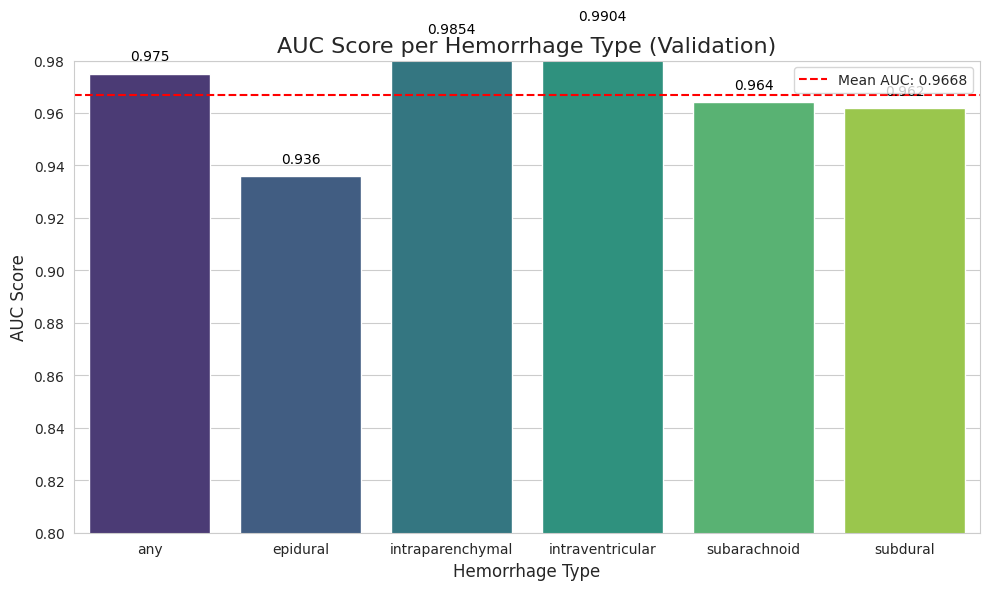


--- Interpretation ---
While the AUC scores vary somewhat, they generally fall within a similar range.
The primary concern remains the 0.0000 recall and precision, which suggests the model is not making positive predictions or is doing so with very low confidence.
This plot helps visualize the individual category performances, but the root cause of the zero recall/precision needs further investigation.


In [3]:
! pip install seaborn 

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data provided
data = {
    'Hemorrhage Type': ['any', 'epidural', 'intraparenchymal', 'intraventricular', 'subarachnoid', 'subdural'],
    'AUC': [0.975, 0.936, 0.9854, 0.9904,0.964 ,0.962]
}

df = pd.DataFrame(data)

# Set a nice style for the plot
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# Create the bar plot
barplot = sns.barplot(x='Hemorrhage Type', y='AUC', data=df, palette='viridis')

# Add titles and labels
plt.title('AUC Score per Hemorrhage Type (Validation)', fontsize=16)
plt.xlabel('Hemorrhage Type', fontsize=12)
plt.ylabel('AUC Score', fontsize=12)
plt.ylim(0.80, 0.98) # Set y-axis limits to focus on the range of AUC values

# Add the exact AUC values on top of the bars
for index, row in df.iterrows():
    barplot.text(row.name, row.AUC + 0.005, round(row.AUC, 4), color='black', ha="center")

# Add a horizontal line for the mean AUC for reference
plt.axhline(y=0.9668, color='r', linestyle='--', label=f'Mean AUC: 0.9668')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

print("\n--- Interpretation ---")
print("While the AUC scores vary somewhat, they generally fall within a similar range.")
print("The primary concern remains the 0.0000 recall and precision, which suggests the model is not making positive predictions or is doing so with very low confidence.")
print("This plot helps visualize the individual category performances, but the root cause of the zero recall/precision needs further investigation.")

In [16]:
import pathlib
# It's common practice to import pathlib.Path directly as Path for convenience
from pathlib import Path

file_path = Path("/home/tibia/Projet_Hemorragie/Seg_hemorragie/split_MONAI/split_info/train_files.txt")

print(f"File path: {file_path}")

# To check if the file exists:
if file_path.exists():
    print(f"File exists: {file_path.exists()}")
    # If you want to get the number of characters in the file (its content length)
    # you would need to open and read it.
    try:
        with open(file_path, 'r') as f:
            content = f.read()
            print(f"Length of file content (characters): {len(content)}")
            # If it's a file with one file path per line and you want to count lines:
            f.seek(0) # Reset file pointer to the beginning
            lines = f.readlines()
            print(f"Number of lines in file: {len(lines)}")

    except Exception as e:
        print(f"Error reading file: {e}")
else:
    print(f"File does not exist at: {file_path}")

File path: /home/tibia/Projet_Hemorragie/Seg_hemorragie/split_MONAI/split_info/train_files.txt
File exists: True
Length of file content (characters): 5082
Number of lines in file: 154
